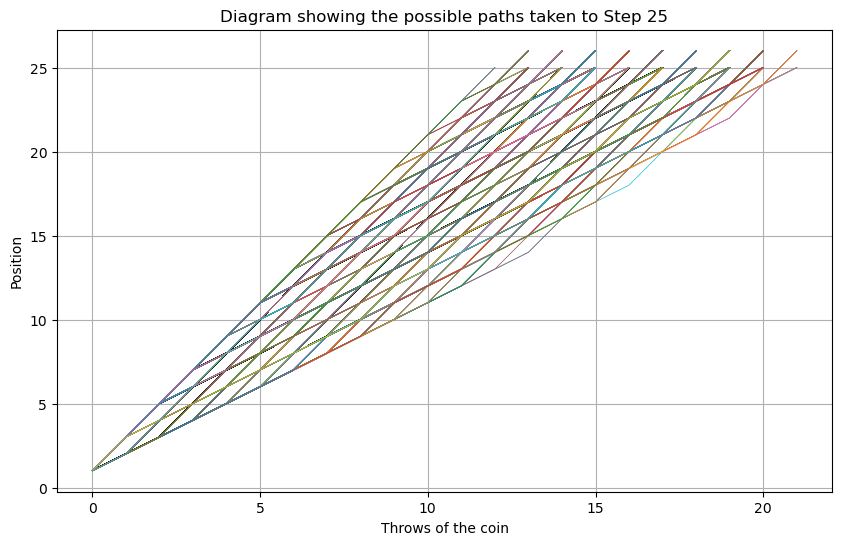

In [1]:
import numpy as np
import matplotlib.pyplot as plt #Import the usual libraries

def randomwalk(steps): #Begin defining our random walk set up starting at square 1
    position = 1
    path = [position]   #This will track the position of the path at all times so we can plot this
    for _ in range(steps):   #For the range of steps we have a ranom choice with equal probability of 1 or 2 
        move = np.random.choice([1, 2])
        position += move    # Move this number of positions and append the new position to the list
        path.append(position)
        if position == 25:  # In order to plot this reduced version of the game we show the paths that exactly reach 25and those that do not
            break
        elif position > 25:  # Return the paths in order to plot
            break
    return path

def plotrandomwalks(walks, steps): #Define another variable that incorporates a for loop to plot all the paths
    plt.figure(figsize=(10, 6))
    for i in range(walks):
        path = randomwalk(steps)   #When originally plotting I had a lot of difficulty getting the graphs altogether and when I created a function it worked.
        plt.plot(range(len(path)), path, linewidth=0.5)
    plt.xlabel('Throws of the coin')    #Usual labelling of axis and actually plotting the graph
    plt.ylabel('Position')
    plt.title('Diagram showing the possible paths taken to Step 25')
    plt.grid(True)
    plt.show()

steps = 24    #Define the number of steps and how many iterations of the game we play
walks = 10000
plotrandomwalks(walks, steps)

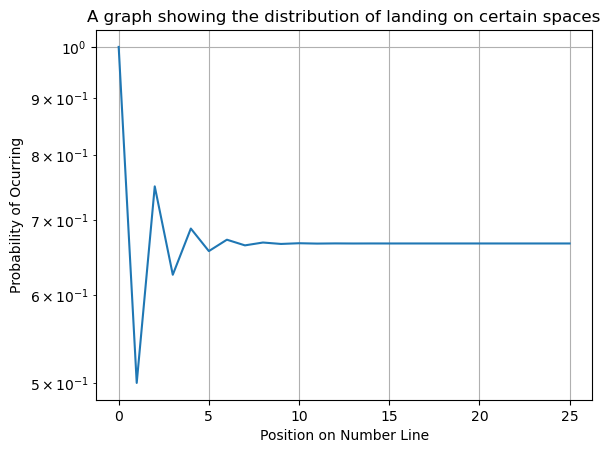

0.6666666567325592

In [2]:
import numpy as np
import matplotlib.pyplot as plt #Import the usual libraries
%matplotlib inline

X = np.array([1])      # Using our week 7 Lab we aim to plot the recursion relation
for i in np.arange(1,26): #Create the iterative for loop and use the difference equation obtained in rubric
    x = 1 - (0.5)*X[i-1]
    X = np.append(X,x)  #Append the results to our array
    
plt.xlabel('Position on Number Line') #Labels as usual with a logarithmic y scale
plt.ylabel('Probability of Ocurring')
plt.title('A graph showing the distribution of landing on certain spaces')
plt.semilogy(X)
plt.grid('on')
plt.show()
X[25]   #Give the actual value of what landing on 25 is

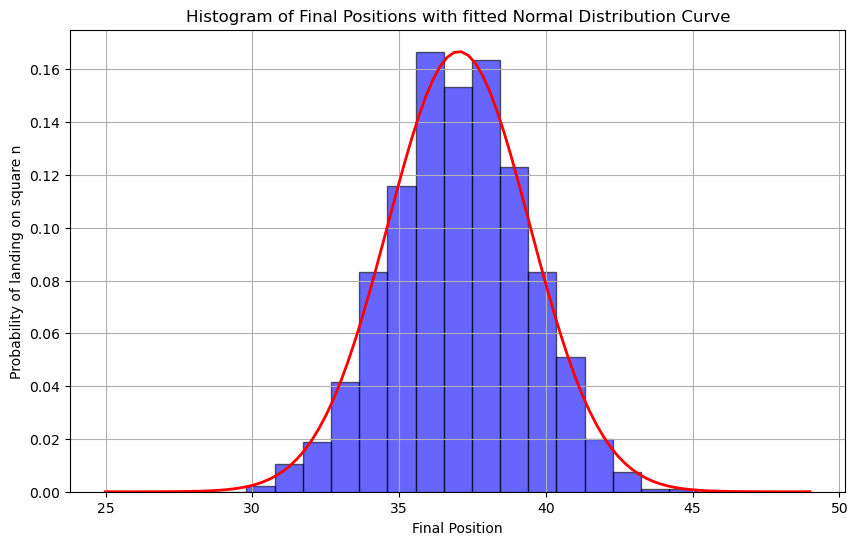

(37.035, 2.417390121598084)

In [3]:
import numpy as np  #This is part of Appendix and therefore this problem could be extended
import matplotlib.pyplot as plt # Import libraries as usual 
import math

def randomwalk(steps):  #This code mirrors the work done above of defining a random walk
    position = 1
    for _ in range(steps):
        move = np.random.choice([1, 2])
        position += move
    return position

def simulatewalks(walks, steps): # Very similar to aobve but now we append the final positions to a list 
    finalpositions = []
    for _ in range(walks):    # To adapt this code this is where we could add a loop to only plot those values that have been through 25
        finalposition = randomwalk(steps)
        finalpositions.append(finalposition)
    return finalpositions


walks = 1000
steps = 24  # Number of steps and iterations of this random walk
finalpositions = simulatewalks(walks, steps)
mu = np.mean(finalpositions)   # Calculate mean and variance of final positions
variance = np.var(finalpositions)


plt.figure(figsize=(10, 6))  #Plot the histogram of final positions
hist, bins, _ = plt.hist(finalpositions, bins=25, range=(25, 49), density=True, alpha=0.6, color='blue', edgecolor='black')

sigma = math.sqrt(variance) # Work out our sigma
x = np.linspace(25, 49, 100)  #We use this array as these are the values that can be obtained from our random walk
normal = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * variance)) #Plot the normal distribution graph
scaling = max(hist) / max(normal)  #Using Siri's labs and book I decided I needed to scale the graph to the histogram 
plt.plot(x, scaling * normal, color='red', linewidth=2)

plt.xlabel('Final Position') #Plots everything and labels the axis
plt.ylabel('Probability of landing on square n')
plt.title('Histogram of Final Positions with fitted Normal Distribution Curve')
plt.grid(True)
plt.show()

mu, sigma #Compare to our values obtained from 

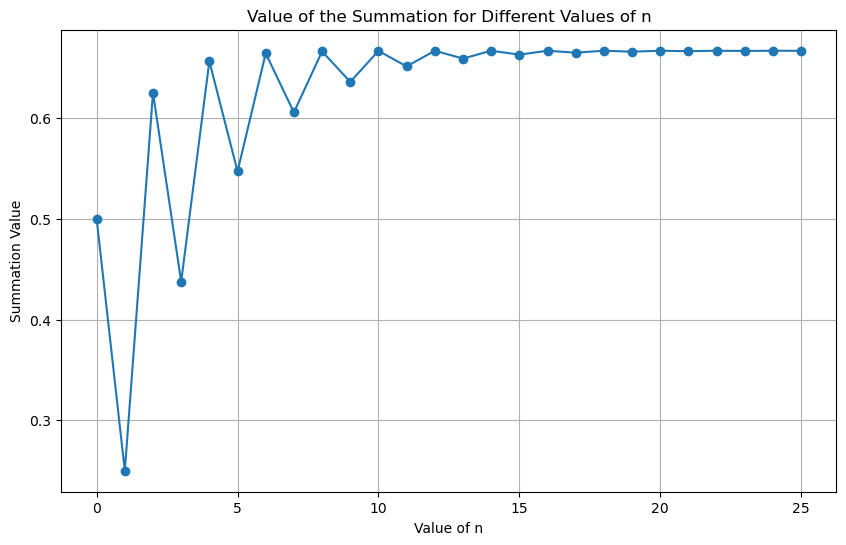

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb  #Usual libraries and having used Scipy in week 8 I did some research to find other mathematical functions used

def recurringsum(n): # Sets up the summation found in previous parts  using the combinatorics function
    summation = 0
    for k in range(int(np.floor(n / 2)) + 1):
        term = 2**-(n - k + 1) * comb(n - k + 1, k)
        summation += term
    return summation

nvalues = range(0, 26) #Sets up the problem for multiple n's
values = [recurringsum(n) for n in nvalues] # Compute summation for all different values of n and stores them to be plotted

plt.figure(figsize=(10, 6))
plt.plot(nvalues, values, marker='o', linestyle='-') #Usual plotting lables and axis 
plt.xlabel('Value of n')
plt.ylabel('Summation Value')
plt.title('Value of the Summation for Different Values of n')
plt.grid(True)
plt.show()